In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/wine_cleared.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.9+ MB


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
df['price_round'] = df['price'].round().astype('int')

In [7]:
df['year'] = df['title'].str.findall('\d{4}').str.get(0).astype('int', copy=False, errors='ignore')

In [8]:
df.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129970 non-null  object 
 11  winery                 129971 non-null  object 
 12  price_round            129971 non-null  int32  
 13  year                   125362 non-null  object 
dtypes: float64(1), int32(1), int64(1), o

In [10]:
df['is_usa'] = df['country'].apply(lambda x: 1 if x == 'US' else 0)

###  Задание 2.1 ###

Выбрать из списка две самых популярных (помимо США) страны, производящих вино.

***Ответ - France, Italy***

In [11]:
df['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

###  Задание 2.2 ###

Создать бинарные признаки `is_france`, `is_italy` наподобие признака `is_usa`.

В ответ вписать результат выполнения кода `data['is_france'].sum()` и `data['is_italy'].sum()`

***Ответ - 22093, 19540***

In [12]:
df['is_france'] = df['country'].apply(lambda x: 1 if x == 'France' else 0)
df['is_italy'] = df['country'].apply(lambda x: 1 if x == 'Italy' else 0)
df['is_france'].sum()

22093

In [13]:
df['is_italy'].sum()

19540

###  Задание 2.3 ###

Создать новый бинарный признак `old_wine`, где значение **1** будет обозначать, что вино старше 2010 года.

В ответ вписать результат выполнения кода `data['old_wine'].sum()`

***Ответ - 39781***

In [14]:
df['old_wine'] = df['year'].apply(lambda x: 1 if pd.to_numeric(x) < 2010 else 0)

In [15]:
df['old_wine'].sum()

39781

###  Задание 2.7 (Самопроверка) ###

Создать новый признак `locality` из признака `title`, который будет обозначать название долины/местности производства вина.

Например, в названии вина **Rainstorm 2013 Pinot Gris (Willamette Valley)** `locality` будет **Willamette Valley**. В названии **Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra)**&nbsp;&mdash; **Navarra**.

In [16]:
df['locality'] = df['title'].str.findall(r'\(.+\)').str.get(0).str.replace('\(|\)', '', regex=True)

In [17]:
df.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1,0,Etna
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1,0,0,0,Willamette Valley
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1,0,0,0,Lake Michigan Shore
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0,0,Willamette Valley


# 3. Создание признаков. Внешние источники данных #

In [18]:
country_population = pd.read_csv('data/country_population.csv', sep=';')
display(country_population)

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


###  Задание 3.1 ###

Каково население Италии согласно датасету `country_population`? Ответ без пробелов и запятых.

***Ответ - 59097904***

In [19]:
display(country_population[country_population.country == 'Italy'].population)

24    59,097,904
Name: population, dtype: object

In [20]:
df.join(country_population.set_index('country'), on='country')

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1,0,Etna,"59,097,904"
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,Douro,"10,347,892"
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1,0,0,0,Willamette Valley,"333,022,386"
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1,0,0,0,Lake Michigan Shore,"333,022,386"
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0,0,Willamette Valley,"333,022,386"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0,0,0,0,Erben Müller-Burggraef 2013 Brauneberger Juffe...,"83,129,285"
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004,1,0,0,1,Oregon,"333,022,386"
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013,0,1,0,0,Alsace,"68,035,000"
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012,0,1,0,0,Alsace,"68,035,000"


In [21]:
country_area = pd.read_csv('data/country_area.csv', sep=';')
display(country_area)

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


###  Задание 3.2 ###

Создать новый признак `area_country`&nbsp;&mdash; площадь страны, аналогичный признаку `country_population`.

Какая площадь страны у вина под названием **'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'**?

Ответ без пробелов, округлить до целых.

***Ответ - 9372610***

In [22]:
df2 = df.join(country_area.set_index('country'), on='country')

In [23]:
df2[df2['title'].str.contains('Reserve Lawrence Vineyards Viognier')].area

94    9372610.0
Name: area, dtype: float64

# 4. Создание признаков. Работа с форматом &laquo;дата-время&raquo; #

In [24]:
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]
calls = pd.DataFrame(calls_list, columns=['client_id', 'agent_date', 'created_at', 'end_date'])
calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])
display(calls)

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [25]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   client_id   10 non-null     int64         
 1   agent_date  10 non-null     datetime64[ns]
 2   created_at  10 non-null     datetime64[ns]
 3   end_date    10 non-null     datetime64[ns]
dtypes: datetime64[ns](3), int64(1)
memory usage: 448.0 bytes


In [26]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
display(calls)

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


###  Задание 4.1 ###

Подсчитать, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат записать в новый признак `time_connection`.

В ответ записать результат выполнения следующего кода: `calls['time_connection'].sum()`.

***Ответ - 89***

In [27]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

###  Задание 4.2 ###

Создать новый признак `is_connection`&nbsp;&mdash; факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе&nbsp;&mdash; 0.

В ответ записать результат выполнения следующего кода: `calls['is_connection'].sum()`.

***Ответ - 7***

In [28]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls['is_connection'].sum()

7

###  Задание 4.3 ###

Создать признак `time_diff`&nbsp;&mdash; разницу в секундах между началом звонка(не разговора) и его окончанием.

В ответ записать результат выполнения следующего кода: `calls['time_diff'].sum()`.

***Ответ - 1144***

In [29]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

In [30]:
display(calls)

,client_id,agent_date,created_at,end_date,duration,time_connection,is_connection,time_diff
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,0,6
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1,233
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0,1,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7,0,9
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1,1,216
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5,1,100
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2,1,94
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0,1,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1,1,95
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66,0,72


In [31]:
calls.drop(columns=['agent_date', 'created_at', 'end_date'], inplace=True)
display(calls)

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


###  Задание 4.5 ###

Создать признак количество дней с момента произведения вина&nbsp;&mdash; `years_diff` для датасета винных обзоров. За дату отсчёта взять **12 января 2022 года**. В ответ вписать максимальное количество дней с момента произведения вина.

Ответ округлить до целого числа.

***Ответ - 98627***

In [32]:
dfc = df.copy()
dfc.drop(columns=['country', 'province', 'variety', 'locality', 'is_usa', 'is_france', 'is_italy'], inplace=True)
dfc.dropna(inplace=True)
list_ini = ['1000', '1070', '1150', '1492', '1503', '1607', '1621', '1637', '1752', '1789',
            '1821', '1827', '1840', '1845', '1847', '1848', '1850', '1852', '1856', '1860',
            '1868', '1870', '1872', '1875', '1877', '1882', '1887', '1898', '1904', '1912',
            '1919', '1927', '1929', '1934', '1935', '1941', '1945', '1947', '1952', '1957',
            '1961', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1973', '1974',
            '1976', '1978', '1980', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
            '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
            '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
            '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '3000',
            '7200']
dfc.drop(index=dfc[dfc.year < '1752'].index, inplace=True)
dfc.drop(index=dfc[dfc.year == '3000'].index, inplace=True)
dfc.drop(index=dfc[dfc.year == '7200'].index, inplace=True)
dfc['year'].unique()

array(['2013', '2011', '2012', '2010', '2007', '2009', '2008', '2014',
       '2015', '2016', '2004', '2003', '2006', '2001', '2005', '2002',
       '1887', '2000', '1999', '1991', '1997', '1996', '1877', '2017',
       '1995', '1872', '1868', '1898', '1998', '1852', '1994', '1992',
       '1840', '1929', '1912', '1875', '1976', '1964', '1848', '1870',
       '1856', '1983', '1967', '1990', '1988', '1827', '1860', '1850',
       '1980', '1987', '1989', '1993', '1969', '1882', '1935', '1821',
       '1973', '1978', '1965', '1968', '1947', '1963', '1985', '1927',
       '1904', '1847', '1982', '1986', '1752', '1789', '1919', '1957',
       '1966', '1984', '1961', '1845', '1952', '1941', '1974', '1934',
       '1945'], dtype=object)

In [33]:
# dfc[dfc.year == '1752']
dfc['days_old'] = pd.to_datetime('2022-01-12') - pd.to_datetime(dfc['year'])
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125331 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   description            125331 non-null  object         
 1   designation            125331 non-null  object         
 2   points                 125331 non-null  int64          
 3   price                  125331 non-null  float64        
 4   region_1               125331 non-null  object         
 5   taster_name            125331 non-null  object         
 6   taster_twitter_handle  125331 non-null  object         
 7   title                  125331 non-null  object         
 8   winery                 125331 non-null  object         
 9   price_round            125331 non-null  int32          
 10  year                   125331 non-null  object         
 11  old_wine               125331 non-null  int64          
 12  days_old               125331 

In [34]:
dfc['days_old'].max()

Timedelta('98627 days 00:00:00')

# 5. Кодирование признаков. Методы #

In [35]:
##### pip install category_encoders
import category_encoders as ce

In [36]:
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]
clothing = pd.DataFrame(clothing_list, columns=['size', 'type'])
display(clothing)

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [37]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size', 'type']])
clothing2 = pd.concat([clothing, data_bin], axis=1)
display(clothing2)

,size,type,size,type
0,xxs,dress,1,1
1,xxs,skirt,1,2
2,xs,dress,2,1
3,s,skirt,3,2
4,m,dress,4,1
5,l,shirt,5,3
6,s,coat,3,4
7,m,coat,4,4
8,xxl,shirt,6,3
9,l,dress,5,1


###  Задание 5.3 (Самопроверка) ###

Использовать ранее изученные методы кодирования и закодировать признак `year` в датасете винных обзоров порядковым кодированием.

In [38]:
data_bin = ord_encoder.fit_transform(df[['year']])
display(data_bin)

,year
0,1
1,2
2,1
3,1
4,3
...,...
129966,1
129967,12
129968,1
129969,3


## Однократное кодирование. One-Hot Encoding ##

In [39]:
encoder = ce.OneHotEncoder(cols=['type'])
type_bin = encoder.fit_transform(clothing['type'])
clothing3 = pd.concat([clothing, type_bin], axis=1)
display(clothing3)

,size,type,type_1,type_2,type_3,type_4
0,xxs,dress,1,0,0,0
1,xxs,skirt,0,1,0,0
2,xs,dress,1,0,0,0
3,s,skirt,0,1,0,0
4,m,dress,1,0,0,0
5,l,shirt,0,0,1,0
6,s,coat,0,0,0,1
7,m,coat,0,0,0,1
8,xxl,shirt,0,0,1,0
9,l,dress,1,0,0,0


###  Задание 5.4 ###

В наборе данных винных обзоров признак, обозначающий имя сомелье (`taster_name`), является номинальным. Закодировать его, используя **One-Hot Encoding**.

В ответе написать, сколько признаков добавилось после применения кодирования.

***Ответ - 20***

In [40]:
encoder2 = ce.OneHotEncoder(cols=['taster_name'])
taster_hot = encoder2.fit_transform(df['taster_name'])
taster_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   taster_name_1   129971 non-null  int64
 1   taster_name_2   129971 non-null  int64
 2   taster_name_3   129971 non-null  int64
 3   taster_name_4   129971 non-null  int64
 4   taster_name_5   129971 non-null  int64
 5   taster_name_6   129971 non-null  int64
 6   taster_name_7   129971 non-null  int64
 7   taster_name_8   129971 non-null  int64
 8   taster_name_9   129971 non-null  int64
 9   taster_name_10  129971 non-null  int64
 10  taster_name_11  129971 non-null  int64
 11  taster_name_12  129971 non-null  int64
 12  taster_name_13  129971 non-null  int64
 13  taster_name_14  129971 non-null  int64
 14  taster_name_15  129971 non-null  int64
 15  taster_name_16  129971 non-null  int64
 16  taster_name_17  129971 non-null  int64
 17  taster_name_18  129971 non-null  int64
 18  tast

## Двоичное кодирование ##

In [41]:
bin_encoder = ce.BinaryEncoder(cols=['type'])
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing4 = pd.concat([clothing, type_bin], axis=1)
display(clothing4)

,size,type,type_0,type_1,type_2
0,xxs,dress,0,0,1
1,xxs,skirt,0,1,0
2,xs,dress,0,0,1
3,s,skirt,0,1,0
4,m,dress,0,0,1
5,l,shirt,0,1,1
6,s,coat,1,0,0
7,m,coat,1,0,0
8,xxl,shirt,0,1,1
9,l,dress,0,0,1


###  Задание 5.5 ###

Закодировать признак `country` двоичным способом.

Сколько новых признаков образовалось после кодирования признака country?

***Ответ - 6***

In [42]:
bin_encoder2 = ce.BinaryEncoder(cols=['country'])
type_bin2 = bin_encoder2.fit_transform(df['country'])
type_bin2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   country_0  129971 non-null  int64
 1   country_1  129971 non-null  int64
 2   country_2  129971 non-null  int64
 3   country_3  129971 non-null  int64
 4   country_4  129971 non-null  int64
 5   country_5  129971 non-null  int64
dtypes: int64(6)
memory usage: 5.9 MB


###  Задание 5.8 ###

На основе изученного материала определить подходящий способ кодирования признака `taster_twitter_handle` из датасета винных обзоров и закодировать его.

В ответе написать, сколько признаков добавилось после применения кодирования.

***Ответ - 5***

In [43]:
encoder3w = ce.OneHotEncoder(cols=['taster_twitter_handle'])
taster_tw = encoder3w.fit_transform(df['taster_twitter_handle'])
taster_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   taster_twitter_handle_1   129971 non-null  int64
 1   taster_twitter_handle_2   129971 non-null  int64
 2   taster_twitter_handle_3   129971 non-null  int64
 3   taster_twitter_handle_4   129971 non-null  int64
 4   taster_twitter_handle_5   129971 non-null  int64
 5   taster_twitter_handle_6   129971 non-null  int64
 6   taster_twitter_handle_7   129971 non-null  int64
 7   taster_twitter_handle_8   129971 non-null  int64
 8   taster_twitter_handle_9   129971 non-null  int64
 9   taster_twitter_handle_10  129971 non-null  int64
 10  taster_twitter_handle_11  129971 non-null  int64
 11  taster_twitter_handle_12  129971 non-null  int64
 12  taster_twitter_handle_13  129971 non-null  int64
 13  taster_twitter_handle_14  129971 non-null  int64
 14  taster_twitter_handl

In [44]:
encoder4w = ce.BinaryEncoder(cols=['taster_twitter_handle'])
type_bin2w = encoder4w.fit_transform(df['taster_twitter_handle'])
type_bin2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   taster_twitter_handle_0  129971 non-null  int64
 1   taster_twitter_handle_1  129971 non-null  int64
 2   taster_twitter_handle_2  129971 non-null  int64
 3   taster_twitter_handle_3  129971 non-null  int64
 4   taster_twitter_handle_4  129971 non-null  int64
dtypes: int64(5)
memory usage: 5.0 MB


###  Задание 5.9 (Самопроверка) ###

Используйте следующий датафрейм для задания.

Определить типы признаков и закодировать их в соответствии с изученными способами.

In [45]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
dfs = pd.DataFrame(list_of_dicts)
display(dfs)

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [46]:
# encoder_b = ce.BinaryEncoder(cols=['product'])
# type_b = encoder_b.fit_transform(dfs['product'])
type_b = ce.BinaryEncoder(cols=['product']).fit_transform(dfs['product'])
type_b.info()
type_h = ce.OneHotEncoder(cols=['payment_type']).fit_transform(dfs['payment_type'])
type_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   product_0  3 non-null      int64
 1   product_1  3 non-null      int64
dtypes: int64(2)
memory usage: 176.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   payment_type_1  3 non-null      int64
 1   payment_type_2  3 non-null      int64
 2   payment_type_3  3 non-null      int64
dtypes: int64(3)
memory usage: 200.0 bytes


# 6. Преобразование признаков. Нормализация. Стандартизация #

## Нормализация ##

In [47]:
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(34)
%matplotlib inline
matplotlib.style.use('ggplot')

In [48]:
dfr = pd.DataFrame({
    'beta': np.random.beta(5, 1, 1000) * 60,
    'exponential': np.random.exponential(10, 1000),
    'normal_p': np.random.normal(10, 2, 1000),
    'normal_l': np.random.normal(10, 10, 1000)
})
col_names = list(dfr.columns)

In [49]:
display(dfr)

,beta,exponential,normal_p,normal_l
0,39.273740,2.263890,11.860245,4.748207
1,55.030395,13.108592,11.796582,10.959172
2,47.434682,3.312019,11.146945,3.919227
3,43.173536,17.664301,8.266689,42.072915
4,45.681443,2.109760,5.112983,16.960664
...,...,...,...,...
995,50.976583,3.748883,7.057497,9.609427
996,46.290172,1.195512,8.419497,14.972852
997,58.912029,7.014868,11.541732,33.654934
998,52.185621,2.391140,11.819914,6.091417


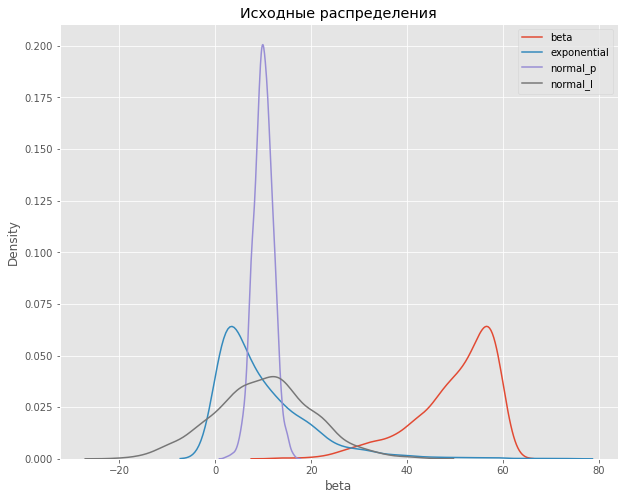

In [50]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

sns.kdeplot(dfr['beta'], ax=ax1, label='beta')
sns.kdeplot(dfr['exponential'], ax=ax1, label='exponential')
sns.kdeplot(dfr['normal_p'], ax=ax1, label='normal_p')
sns.kdeplot(dfr['normal_l'], ax=ax1, label='normal_l')
plt.legend();

In [51]:
dfr.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


### MinMaxScaler $$x_{scaled}=\frac{x-x_{min}}{x_{max}-x_{min}}$$ ###

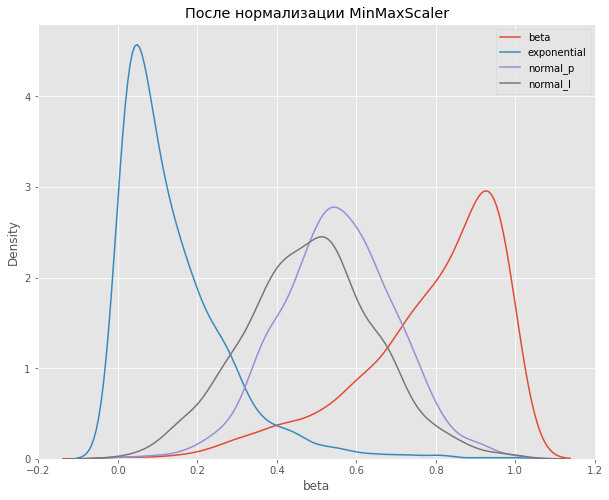

In [52]:
mm_scaler = preprocessing.MinMaxScaler()
dfr_mm = mm_scaler.fit_transform(dfr)
dfr_mm = pd.DataFrame(dfr_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')
sns.kdeplot(dfr_mm['beta'], ax=ax1, label='beta')
sns.kdeplot(dfr_mm['exponential'], ax=ax1, label='exponential')
sns.kdeplot(dfr_mm['normal_p'], ax=ax1, label='normal_p')
sns.kdeplot(dfr_mm['normal_l'], ax=ax1, label='normal_l')
plt.legend();

In [53]:
dfr_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


### RobustScaler $$x_{scaled}=\frac{x-x_{median}}{IQR}$$ ###

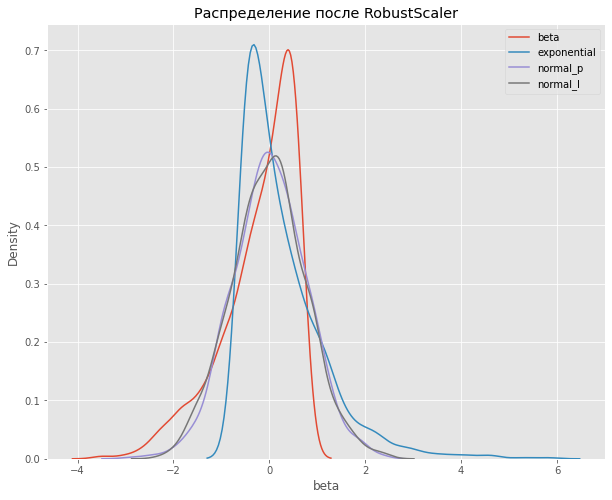

In [54]:
r_scaler = preprocessing.RobustScaler()
dfr_r = r_scaler.fit_transform(dfr)
dfr_r = pd.DataFrame(dfr_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределение после RobustScaler')
sns.kdeplot(dfr_r['beta'], ax=ax1, label='beta')
sns.kdeplot(dfr_r['exponential'], ax=ax1, label='exponential')
sns.kdeplot(dfr_r['normal_p'], ax=ax1, label='normal_p')
sns.kdeplot(dfr_r['normal_l'], ax=ax1, label='normal_l')
plt.legend();

In [55]:
dfr_r.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


### Стандартизация (StandardScaler) $$X_{scaled}=\frac{x-x_{mean}}{\sigma_{std}}$$ ###

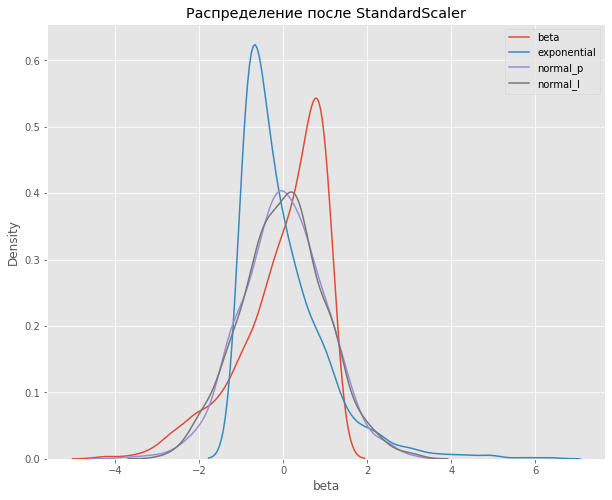

In [56]:
s_scaler = preprocessing.StandardScaler()
dfr_s = s_scaler.fit_transform(dfr)
dfr_s = pd.DataFrame(dfr_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределение после StandardScaler')
sns.kdeplot(dfr_s['beta'], ax=ax1, label='beta')
sns.kdeplot(dfr_s['exponential'], ax=ax1, label='exponential')
sns.kdeplot(dfr_s['normal_p'], ax=ax1, label='normal_p')
sns.kdeplot(dfr_s['normal_l'], ax=ax1, label='normal_l')
plt.legend();

In [57]:
dfr_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


###  Задание 6.4 ###

Нормализовать признак `price`. Использовать подходящий тип нормализации.

В ответе написать результат выполнения кода `data['price'].sum()`, округлённый до целого.

***Ответ - 43501***

In [181]:
dfm = df[['points', 'price']]
minmax_scaler = preprocessing.RobustScaler()
df_mm = minmax_scaler.fit_transform(dfm)
df_mm = pd.DataFrame(df_mm, columns=['points', 'price'])
display(round(df_mm['price'].sum()))


43501

###  Задание 6.5 ###

Стандартизировать исходный признак `price`.

В ответе написать результат выполнения кода `data['price'][129968]`.

Ответ округлить до сотых.

***Ответ - -0.14***

In [188]:
dfss = df[['points', 'price']]
ss_scaler = preprocessing.StandardScaler()
dfss = ss_scaler.fit_transform(dfss)
dfss = pd.DataFrame(dfss, columns=['points', 'price'])
display(dfss.iloc[129960:])
round(dfss['price'][129968], 2)

,points,price
129960,0.510857,0.319292
129961,0.510857,-0.135518
129962,0.510857,0.117154
129963,0.510857,-0.388191
129964,0.510857,0.000000
129965,0.510857,-0.186053
129966,0.510857,-0.186053
129967,0.510857,1.001508
129968,0.510857,-0.135518
129969,0.510857,-0.084984


-0.14

# 7. Отбор признаков. Мультиколлинеарность #

In [61]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


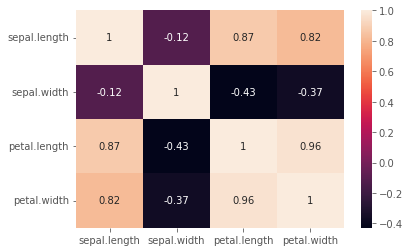

In [62]:
sns.heatmap(iris.corr(), annot=True);

In [63]:
iris.drop(columns=['petal.width'], inplace=True)

In [64]:
iris.drop(columns=['petal.length'], inplace=True)
display(iris.head())

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


In [65]:
df7 = df.copy()
df7.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1,0,Etna
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1,0,0,0,Willamette Valley
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1,0,0,0,Lake Michigan Shore
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0,0,Willamette Valley


### Задание 7.3 ###

Какие из признаков имеют самую сильную корреляционную связь?

***Ответ - price + price_round***

In [66]:
df7.corr()

,points,price,price_round,is_usa,is_france,is_italy,old_wine
points,1.000000,0.402137,0.402065,0.032594,0.059249,0.015927,-0.046297
price,0.402137,1.000000,0.999997,0.025870,0.053138,0.039564,0.055561
price_round,0.402065,0.999997,1.000000,0.026376,0.052614,0.039312,0.055458
is_usa,0.032594,0.025870,0.026376,1.000000,-0.384589,-0.357481,-0.007523
is_france,0.059249,0.053138,0.052614,-0.384589,1.000000,-0.190361,-0.082898
is_italy,0.015927,0.039564,0.039312,-0.357481,-0.190361,1.000000,0.085635
old_wine,-0.046297,0.055561,0.055458,-0.007523,-0.082898,0.085635,1.000000


###  Задание 7.4 (Самопроверка) ###

Провести корреляционный анализ всего набора данных и отобрать только необходимые признаки для предсказания рейтинга вина.

Удалять признак рейтинг — `points` нельзя!

Для простоты вычислений можно использовать только корреляцию Пирсона.

<AxesSubplot: >

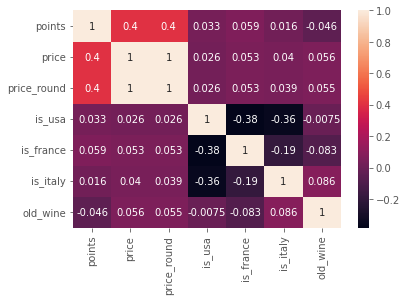

In [67]:
sns.heatmap(df7.corr(), annot=True)

----

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

- **age** — возраст
- **sex** — пол (1 - мужчина, 0 - женщина)
- **cp** — тип боли в груди (4 значения)
- **trestbps** — артериальное давление в покое
- **chol** — холестерин сыворотки в мг/дл
- **fbs** — уровень сахара в крови натощак > 120 мг/дл
- **restecg** — результаты электрокардиографии в покое (значения 0,1,2)
- **thalach** — достигнута максимальная частота сердечных сокращений
- **exang** — стенокардия, вызванная физической нагрузкой
- **oldpeak** — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
- **slope** — наклон пикового сегмента ST при нагрузке
- **ca** — количество крупных сосудов (0-3), окрашенных при флюроскопии
- **thal** — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект


In [104]:
df8 = pd.read_csv('data/heart.csv', sep=',')

In [105]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [106]:
df8.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###  Задание 8.1 ###

Создать новый признак `old`, где 1&nbsp;&mdash; при возрасте пациента более 60 лет.

В ответ ввести результат выполнения кода `heart['old'].sum()`.

***Ответ - 79***

In [107]:
df8['old'] = df8['age'].apply(lambda x: 1 if x > 60 else 0)
df8['old'].sum()

79

###  Задание 8.2 ###

Создать новый признак `trestbps_mean`, который будет обозначать норму давления в среднем для его возраста и пола. `trestbps`&nbsp;&mdash; систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола взять из таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

```
Возраст(лет)    Мужчины    Женщины
до 20           123/76     116/72
21-30           126/79     120/75
31-40           129/81     127/80
41-50           135/83     137/84
51-60           142/85     144/85
61 и старше     142/80     159/85
```

В ответ написать значение признака `trestbps_mean` для пациента под номером 300.

***Ответ - 142***

In [108]:
table_list = [
    {'m': 123, 'w': 116},
    {'m': 126, 'w': 120},
    {'m': 129, 'w': 127},
    {'m': 135, 'w': 137},
    {'m': 142, 'w': 144},
    {'m': 142, 'w': 159},
]

def fill_trest(t_, age_, sex_):
    if age_ <= 20:
        return table_list[0]['m'] if sex_ == 1 else table_list[0]['w']
    elif 21 < age_ <= 30:
        return table_list[1]['m'] if sex_ == 1 else table_list[1]['w']
    elif 31 < age_ <= 40:
        return table_list[2]['m'] if sex_ == 1 else table_list[2]['w']
    elif 41 < age_ <= 50:
        return table_list[3]['m'] if sex_ == 1 else table_list[3]['w']
    elif 51 < age_ <= 60:
        return table_list[4]['m'] if sex_ == 1 else table_list[4]['w']
    else:
        return table_list[5]['m'] if sex_ == 1 else table_list[5]['w']

def ft_m(age_):
    if age_ <= 20:
        return table_list[0]['m']
    elif 21 < age_ <= 30:
        return table_list[1]['m']
    elif 31 < age_ <= 40:
        return table_list[2]['m']
    elif 41 < age_ <= 50:
        return table_list[3]['m']
    elif 51 < age_ <= 60:
        return table_list[4]['m']
    else:
        return table_list[5]['m']

def ft_w(age_):
    if age_ <= 20:
        return table_list[0]['w']
    elif 21 < age_ <= 30:
        return table_list[1]['w']
    elif 31 < age_ <= 40:
        return table_list[2]['w']
    elif 41 < age_ <= 50:
        return table_list[3]['w']
    elif 51 < age_ <= 60:
        return table_list[4]['w']
    else:
        return table_list[5]['w']


In [111]:
df8['t_m'] = df8[df8['sex'] == 1]['age'].apply(ft_m)
df8['t_m'].fillna(value=0, inplace=True)
df8['t_w'] = df8[df8['sex'] == 0]['age'].apply(ft_w)
df8['t_w'].fillna(value=0, inplace=True)
df8['trestbps_mean'] = df8['t_m'] + df8['t_w']
df8.drop(columns=['t_m', 't_w'], inplace=True)

In [114]:
display(round(df8['trestbps_mean'].iloc[300]))

142

###  Задание 8.5 ###

Закодировать вышеперечисленные признаки (`cp`, `restecg`, `slope`, `ca`, `thal`) методом `OneHotEncoding` без удаления исходных признаков.

Сколько признаков получилось в датасете?

***Ответ - 35***

In [157]:
enc_cp = ce.OneHotEncoder(cols=['cp'])
bin_cp = enc_cp.fit_transform(df8['cp'])
df8 = pd.concat([df8, bin_cp], axis=1)

In [159]:
enc_restecg = ce.OneHotEncoder(cols=['restecg'])
bin_restecg = enc_restecg.fit_transform(df8['restecg'])
df8 = pd.concat([df8, bin_restecg], axis=1)

In [160]:
enc_slope = ce.OneHotEncoder(cols=['slope'])
bin_slope = enc_slope.fit_transform(df8['slope'])
df8 = pd.concat([df8, bin_slope], axis=1)

In [161]:
enc_ca = ce.OneHotEncoder(cols=['ca'])
bin_ca = enc_ca.fit_transform(df8['ca'])
df8 = pd.concat([df8, bin_ca], axis=1)

In [162]:
enc_thal = ce.OneHotEncoder(cols=['thal'])
bin_thal = enc_thal.fit_transform(df8['thal'])
df8 = pd.concat([df8, bin_thal], axis=1)

In [165]:
df8.shape[1]

35

###  Задание 8.6 ###

Нормализовать все числовые признаки подходящим способом.

В ответе написать стандартное отклонение признака `chol`.

Ответ округлить до шести знаков после запятой.

***Ответ - 0.816232***

In [230]:
clist = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
         'slope', 'ca', 'thal', 'target', 'old', 'trestbps_mean', 'cp_1', 'cp_2', 'cp_3', 'cp_4',
         'restecg_1', 'restecg_2', 'restecg_3', 'slope_1', 'slope_2', 'slope_3', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
         'ca_5', 'thal_1', 'thal_2', 'thal_3', 'thal_4']

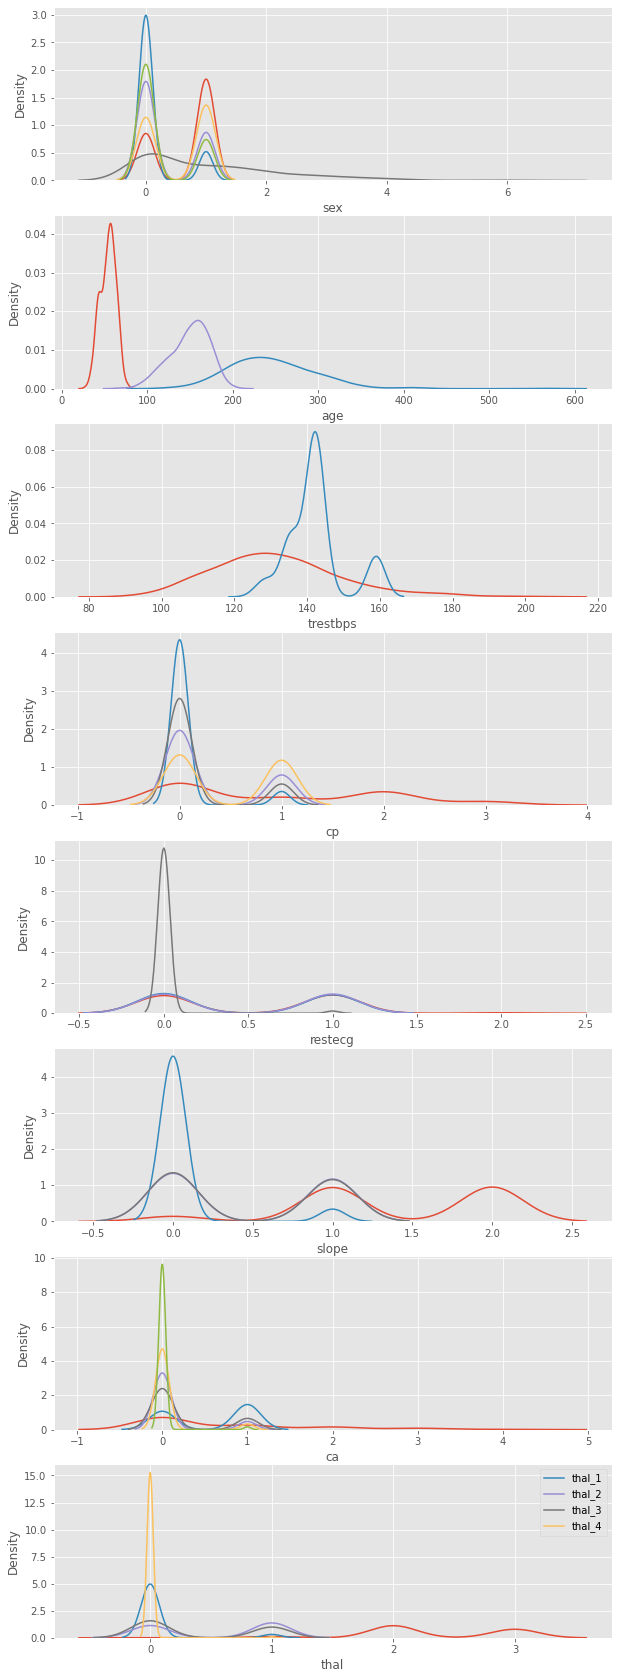

In [231]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=8, figsize=(10, 30))
# ax1.set_title('1')
# ax2.set_title('2')
# ax3.set_title('3')
# ax4.set_title('4')
# ax5.set_title('5')
# ax6.set_title('6')
# sns.kdeplot(df8[''], ax=ax1, label='')

sns.kdeplot(df8['sex'], ax=ax1, label='sex')
sns.kdeplot(df8['fbs'], ax=ax1, label='fbs')
sns.kdeplot(df8['exang'], ax=ax1, label='exang')
sns.kdeplot(df8['oldpeak'], ax=ax1, label='oldpeak')
sns.kdeplot(df8['target'], ax=ax1, label='')
sns.kdeplot(df8['old'], ax=ax1, label='')

sns.kdeplot(df8['age'], ax=ax2, label='age')
sns.kdeplot(df8['chol'], ax=ax2, label='chol')
sns.kdeplot(df8['thalach'], ax=ax2, label='thalach')

sns.kdeplot(df8['trestbps'], ax=ax3, label='trestpbs')
sns.kdeplot(df8['trestbps_mean'], ax=ax3, label='trestbps_mean')

sns.kdeplot(df8['cp'], ax=ax4, label='cp')
sns.kdeplot(df8['cp_1'], ax=ax4, label='cp_1')
sns.kdeplot(df8['cp_2'], ax=ax4, label='cp_2')
sns.kdeplot(df8['cp_3'], ax=ax4, label='cp_3')
sns.kdeplot(df8['cp_4'], ax=ax4, label='cp_4')

sns.kdeplot(df8['restecg'], ax=ax5, label='restecg')
sns.kdeplot(df8['restecg_1'], ax=ax5, label='restecg_1')
sns.kdeplot(df8['restecg_2'], ax=ax5, label='restecg_2')
sns.kdeplot(df8['restecg_3'], ax=ax5, label='restecg_3')

sns.kdeplot(df8['slope'], ax=ax6, label='')
sns.kdeplot(df8['slope_1'], ax=ax6, label='slope_1')
sns.kdeplot(df8['slope_2'], ax=ax6, label='slope_2')
sns.kdeplot(df8['slope_3'], ax=ax6, label='slope_3')

sns.kdeplot(df8['ca'], ax=ax7, label='')
sns.kdeplot(df8['ca_1'], ax=ax7, label='ca_1')
sns.kdeplot(df8['ca_2'], ax=ax7, label='ca_2')
sns.kdeplot(df8['ca_3'], ax=ax7, label='ca_3')
sns.kdeplot(df8['ca_4'], ax=ax7, label='ca_4')
sns.kdeplot(df8['ca_5'], ax=ax7, label='ca_5')

sns.kdeplot(df8['thal'], ax=ax8, label='')
sns.kdeplot(df8['thal_1'], ax=ax8, label='thal_1')
sns.kdeplot(df8['thal_2'], ax=ax8, label='thal_2')
sns.kdeplot(df8['thal_3'], ax=ax8, label='thal_3')
sns.kdeplot(df8['thal_4'], ax=ax8, label='thal_4')

plt.legend();

In [232]:
mm8_scaler = preprocessing.MinMaxScaler()
df8_mm8 = mm8_scaler.fit_transform(df8)
df8_mm8 = pd.DataFrame(df8_mm8, columns=clist)
df8_mm8['chol'].describe()

count    303.000000
mean       0.274575
std        0.118335
min        0.000000
25%        0.194064
50%        0.260274
75%        0.339041
max        1.000000
Name: chol, dtype: float64

In [233]:
rb8_scaler = preprocessing.RobustScaler()
df8_rb8 = rb8_scaler.fit_transform(df8)
df8_rb8 = pd.DataFrame(df8_rb8, columns=clist)
df8_rb8['chol'].describe()

count    303.000000
mean       0.098646
std        0.816232
min       -1.795276
25%       -0.456693
50%        0.000000
75%        0.543307
max        5.102362
Name: chol, dtype: float64

###  Задание 8.7 ###

Провести корреляционный анализ и отобрать признаки для будущей модели. Выбрать пары сильно скоррелированных признаков.

In [252]:
df8_rb8.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,...,0.177201,-0.350844,0.226491,0.179284,0.162243,-0.122378,0.063758,-0.135891,0.110752,-0.016779
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,...,-0.009157,-0.122854,-0.020571,0.096673,0.066758,0.088212,0.141135,-0.376365,0.321559,-0.032093
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,...,-0.156633,0.193087,-0.171632,-0.045686,-0.107590,0.054436,-0.073254,0.266947,-0.237760,0.002611
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,...,0.025207,-0.055011,0.088386,-0.059485,0.080109,0.019059,0.076369,-0.140712,0.109573,-0.016870
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,...,0.051177,-0.080600,0.059887,0.018775,0.098568,-0.095785,-0.093560,-0.004591,0.059621,-0.057127
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,...,-0.033360,-0.112548,0.122080,-0.014774,0.075867,0.018754,0.091351,-0.086774,0.030953,0.080568
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,...,-0.087349,0.096607,-0.058198,-0.050897,-0.064842,0.067098,-0.013429,0.029597,-0.023012,-0.004356
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,...,-0.419627,0.273136,-0.056905,-0.195502,-0.175506,0.060911,-0.159748,0.294801,-0.215417,-0.050429
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,...,0.257687,-0.187734,0.097399,0.150206,0.013188,-0.035001,0.063073,-0.328539,0.300223,0.030113
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,...,0.310986,-0.204803,0.218319,-0.011613,0.189296,-0.104998,0.104635,-0.339086,0.302145,-0.037946
